# Building Models

In [1]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


In [2]:
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

## Model 0: Dadi features only

In [3]:
import os
os.chdir('/sietch_colab/akapoor/Demographic_Inference/')
experiment_directory = 'model0_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [4]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [5]:
train_features = features_and_targets['training']['features']
validation_features = features_and_targets['validation']['features']

train_targets = features_and_targets['training']['targets']
validation_targets = features_and_targets['validation']['targets']

In [6]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl0 = train_features[
    train_features.columns[train_features.columns.str.contains('dadi', case=False)]
]
validation_features_mdl0 = validation_features[
    validation_features.columns[validation_features.columns.str.contains('dadi', case=False)]
]

In [7]:
train_targets_mdl0 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl0 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [8]:
train_features_mdl0

,dadi_rep1_Na,dadi_rep1_N1,dadi_rep1_N2,dadi_rep1_t_split,dadi_rep2_Na,dadi_rep2_N1,dadi_rep2_N2,dadi_rep2_t_split
0,19260.928013,11923.469066,25662.858324,1887.406348,19260.916716,11923.487126,25662.887497,1887.411813
1,16739.867624,28308.987562,27394.557856,15634.506091,16739.666509,28308.894293,27394.556262,15634.829761
2,29154.876743,21122.069219,4018.536681,12492.603927,29188.946521,21083.604620,4017.891878,12531.919639
3,6492.312960,26265.239051,20426.286985,1039.622796,6485.397727,27329.638129,21208.618716,1037.849954
4,16331.949271,4009.324200,6359.820892,6016.588652,16331.821214,4009.314992,6359.783729,6015.975587
...,...,...,...,...,...,...,...,...
3055,23342.543298,24934.534015,21550.882469,4894.474661,23342.684707,24936.277328,21550.874508,4893.928517
3056,22130.473377,3812.050961,2293.820712,4206.976128,22121.492656,3805.279546,2289.228476,4183.492292
3057,25009.974665,15807.458655,20497.894883,6074.695873,25009.947706,15807.239238,20498.498702,6074.513456
3058,10431.179115,10860.509908,7891.603421,17176.892333,10430.788712,10860.668043,7891.666410,17177.263882


In [9]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [10]:
features_and_targets['training']['features'] = train_features_mdl0.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl0.to_numpy()

In [11]:
features_and_targets['training']['targets'] = train_targets_mdl0.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl0.to_numpy()

In [12]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [13]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [14]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (3060, 4)
[9.03728922e-04 3.75589869e-04 3.28001925e-04 ... 8.01753672e-05
 5.40189500e-05 2.95967111e-03]
[3.34332974e-04 7.22424052e-05 2.77755550e-04 3.11038586e-05
 7.86708722e-05 3.94464291e-04 3.71512706e-05 2.39640598e-04
 1.27867696e-04 1.69993433e-04 6.25538126e-05 5.62112322e-05
 1.41252184e-04 8.77348590e-05 4.07477893e-04 7.04904101e-05
 7.77896531e-05 3.37966344e-05 4.95502952e-04 1.53146595e-04
 2.52730718e-04 1.91240333e-04 1.06009416e-04 5.47388801e-05
 1.19841246e-04 2.01863387e-04 9.16796646e-05 1.23621361e-04
 3.12088403e-04 3.38804800e-04 1.06491714e-04 7.80138087e-04
 1.87035729e-04 3.84369730e-05 3.22064520e-05 1.06250206e-04
 1.20203623e-03 3.56518436e-03 3.35551567e-04 6.27623362e-04
 2.93938818e-04 1.49118287e-04 2.05406838e-04 3.28577724e-04
 1.23353500e-04 1.37589267e-04 9.89976691e-05 9.01074529e-05
 4.05537913e-05 2.03955393e-04 4.08428682e-04 2.14050258e-04
 4.80414104e-04 1.43227770e-04 1.48752105e-03 6.60913447e-05
 1.29372975

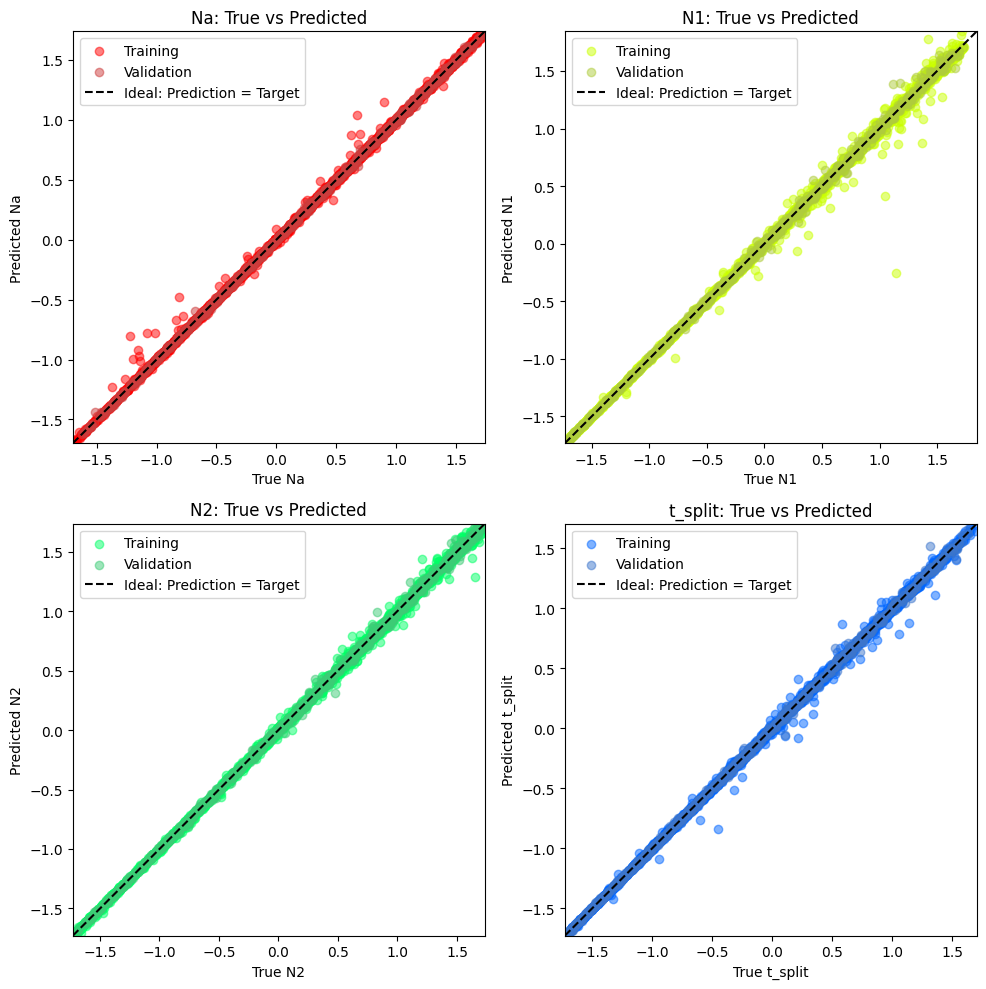

Linear model trained LFG


In [15]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

In [16]:
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/postprocessing_results.pkl', 'rb') as f:
    postprocessing_results = pickle.load(f)

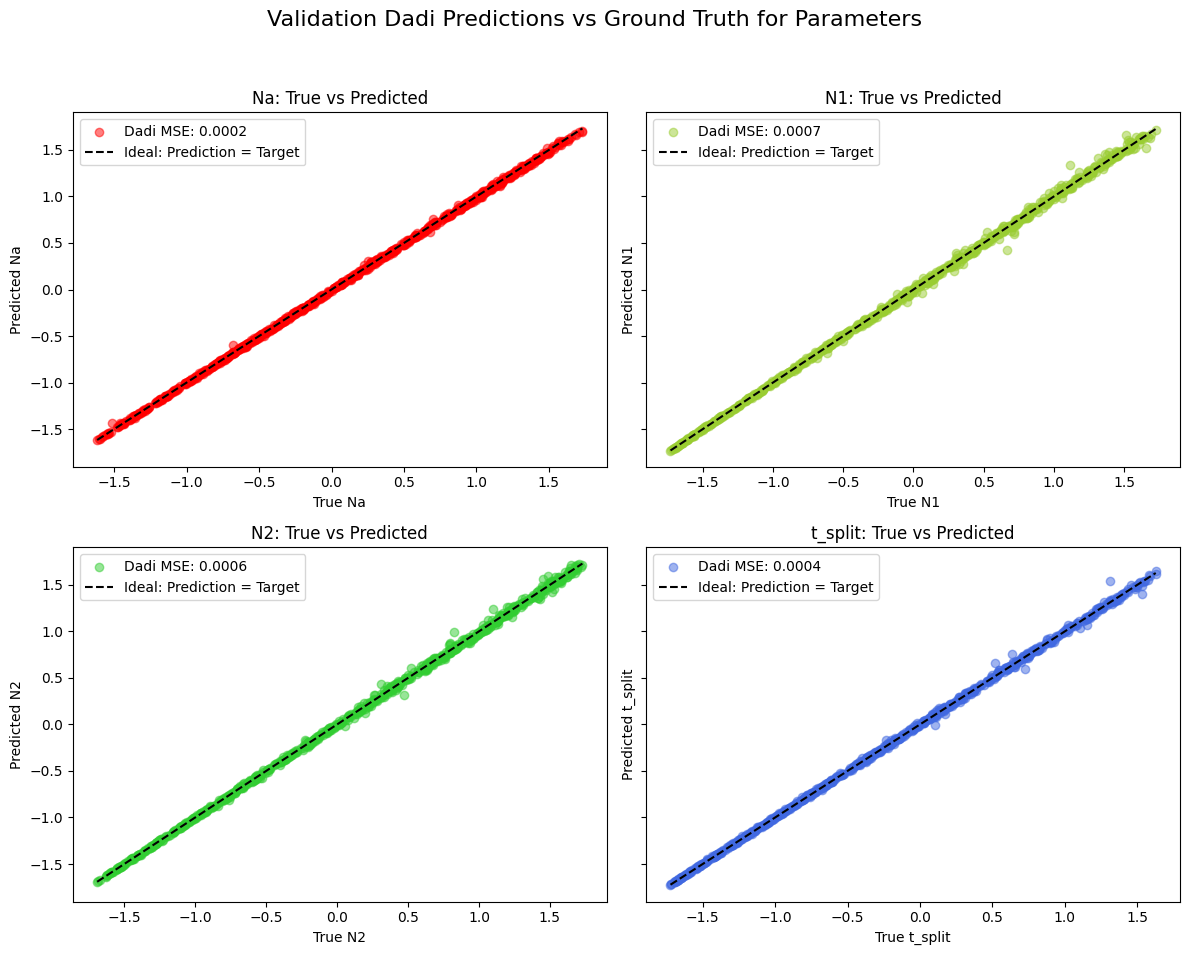

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Define parameters and their colors
parameters = ['Na', 'N1', 'N2', 't_split']
parameter_colors = {'Na': 'red', 'N1': 'yellowgreen', 'N2': 'limegreen', 't_split': 'royalblue'}

# Extract ground truth and predictions
ground_truth = postprocessing_results['validation']['normalized_targets']
predictions = postprocessing_results['validation']['normalized_predictions']

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
fig.suptitle('Validation Dadi Predictions vs Ground Truth for Parameters', fontsize=16)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, param in enumerate(parameters):
    ax = axes[i]
    
    # Extract ground truth and dadi predictions for this parameter
    ground_truth_param = ground_truth[f'simulated_params_{param}']
    dadi_rep1 = predictions[f'dadi_rep1_{param}']
    
    # Calculate MSE for dadi
    mse_dadi = calculate_mse(ground_truth_param, dadi_rep1)
    
    # Plot dadi predictions with the specific color
    ax.scatter(ground_truth_param, dadi_rep1, color=parameter_colors[param], alpha=0.5, 
               label=f'Dadi MSE: {mse_dadi:.4f}')
    
    # Perfect prediction line
    ax.plot([ground_truth_param.min(), ground_truth_param.max()],
            [ground_truth_param.min(), ground_truth_param.max()],
            color='black', linestyle='--', label='Ideal: Prediction = Target')
    
    # Titles and labels
    ax.set_title(f'{param}: True vs Predicted')
    ax.set_xlabel(f'True {param}')
    ax.set_ylabel(f'Predicted {param}')
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for suptitle
plt.show()


In [52]:
with open('/sietch_colab/akapoor/Demographic_Inference/model0_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [53]:
import numpy as np

# Extract predictions and targets
predictions = linear_mdl_obj['training']['predictions']
targets = linear_mdl_obj['training']['targets']

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE for each column
mse_values = []
for col in range(targets.shape[1]):
    mse = calculate_mse(targets[:, col], predictions[:, col])
    mse_values.append(mse)

# Print MSE results for each column
for i, mse in enumerate(mse_values):
    print(f"Column {i + 1} MSE: {mse:.4f}")


Column 1 MSE: 0.0005
Column 2 MSE: 0.0018
Column 3 MSE: 0.0006
Column 4 MSE: 0.0006


## Model 1: Moments, Dadi, MomentsLD features only

In [54]:
experiment_directory = 'model1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [55]:
os.makedirs(experiment_directory, exist_ok=True)

First remove the log likelihood features and the FIM features

In [56]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl1 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl1 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [57]:
train_targets_mdl1 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl1 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [58]:
train_features_mdl1

,dadi_rep1_Na,moments_rep1_Na,dadi_rep1_N1,moments_rep1_N1,dadi_rep1_N2,moments_rep1_N2,dadi_rep1_t_split,moments_rep1_t_split,dadi_rep2_Na,moments_rep2_Na,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,19260.928013,19308.973163,11923.469066,11940.278187,25662.858324,25543.496745,1887.406348,1878.621907,19260.916716,19308.958595,11923.487126,11940.226814,25662.887497,25543.886903,1887.411813,1878.616695,19039.244606,12136.260496,26540.136648,1880.557323
1,16739.867624,16787.448862,28308.987562,28294.659582,27394.557856,27382.379430,15634.506091,15637.656146,16739.666509,16785.009006,28308.894293,28303.981053,27394.556262,27380.397032,15634.829761,15636.795904,17293.251005,28339.335570,27363.714205,16237.699003
2,29154.876743,29193.933669,21122.069219,21135.213795,4018.536681,4026.230517,12492.603927,12496.332293,29188.946521,29192.009988,21083.604620,21138.010729,4017.891878,4025.983688,12531.919639,12494.068479,29488.113014,21645.500877,4040.579011,12865.523144
3,6492.312960,6524.674095,26265.239051,26247.535502,20426.286985,20613.607438,1039.622796,1031.725387,6485.397727,6525.275397,27329.638129,26299.284192,21208.618716,20615.392792,1037.849954,1031.109298,6244.174997,28150.117500,21409.183867,1038.951105
4,16331.949271,16356.405959,4009.324200,4016.374924,6359.820892,6366.914140,6016.588652,6027.735562,16331.821214,16353.653629,4009.314992,4015.828139,6359.783729,6366.928658,6015.975587,6015.819322,16238.836310,4028.539337,6496.426033,6200.148194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,23342.543298,23415.687867,24934.534015,24873.896585,21550.882469,21548.952286,4894.474661,4865.036575,23342.684707,23406.061802,24936.277328,24869.839707,21550.874508,21550.053556,4893.928517,4876.751403,23880.519655,24979.645755,21836.828722,4850.271894
3056,22130.473377,22171.878035,3812.050961,3815.548453,2293.820712,2299.416310,4206.976128,4220.952623,22121.492656,22166.560876,3805.279546,3818.794126,2289.228476,2303.463411,4183.492292,4228.760523,23501.924813,3876.365604,2323.144703,4207.904408
3057,25009.974665,25063.519416,15807.458655,15817.704749,20497.894883,20509.384633,6074.695873,6066.936786,25009.947706,25059.389276,15807.239238,15828.658771,20498.498702,20502.674234,6074.513456,6071.569707,25026.095942,15861.289905,20939.975514,6094.510162
3058,10431.179115,10451.333442,10860.509908,10869.959682,7891.603421,7898.982666,17176.892333,17196.595884,10430.788712,10458.198449,10860.668043,10868.259241,7891.666410,7898.329950,17177.263882,17184.392318,12077.473937,11691.330652,8614.949135,19340.807319


In [59]:
import pickle
with open(f'/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [60]:
features_and_targets['training']['features'] = train_features_mdl1.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl1.to_numpy()

In [61]:
features_and_targets['training']['targets'] = train_targets_mdl1.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl1.to_numpy()

In [62]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [63]:
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'

In [64]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (3060, 4)
[1.06333851e-03 4.39274411e-04 3.10928434e-04 ... 7.97311473e-05
 1.69497508e-05 2.82377472e-03]
[4.11843321e-04 6.78604030e-05 3.30572692e-04 3.96704918e-05
 1.03040048e-04 3.65445654e-04 3.12526523e-05 2.14363325e-04
 9.64136370e-05 1.39476634e-04 5.81994661e-05 5.70638355e-05
 1.48651225e-04 1.16562241e-04 3.71146710e-04 3.70517255e-05
 1.14227156e-04 5.71829472e-05 3.73621062e-04 6.50939709e-05
 2.31611047e-04 1.80887540e-04 6.62547078e-05 1.27760181e-04
 1.33576716e-04 1.77018653e-04 9.18296693e-05 9.76871971e-05
 2.63897633e-04 3.11405302e-04 1.22104690e-04 8.41602347e-04
 1.71492729e-04 2.30910320e-05 2.77197417e-05 9.76297246e-05
 1.21833785e-03 3.82547893e-03 3.35876369e-04 5.90867908e-04
 3.24661223e-04 2.40032549e-04 1.75488107e-04 3.23536974e-04
 9.34128472e-05 1.66041591e-04 4.20206868e-05 3.37373013e-05
 3.38747665e-05 2.10814369e-04 4.28794920e-04 1.76436981e-04
 4.96724215e-04 1.41324096e-04 1.38923429e-03 6.84220422e-05
 1.27808320

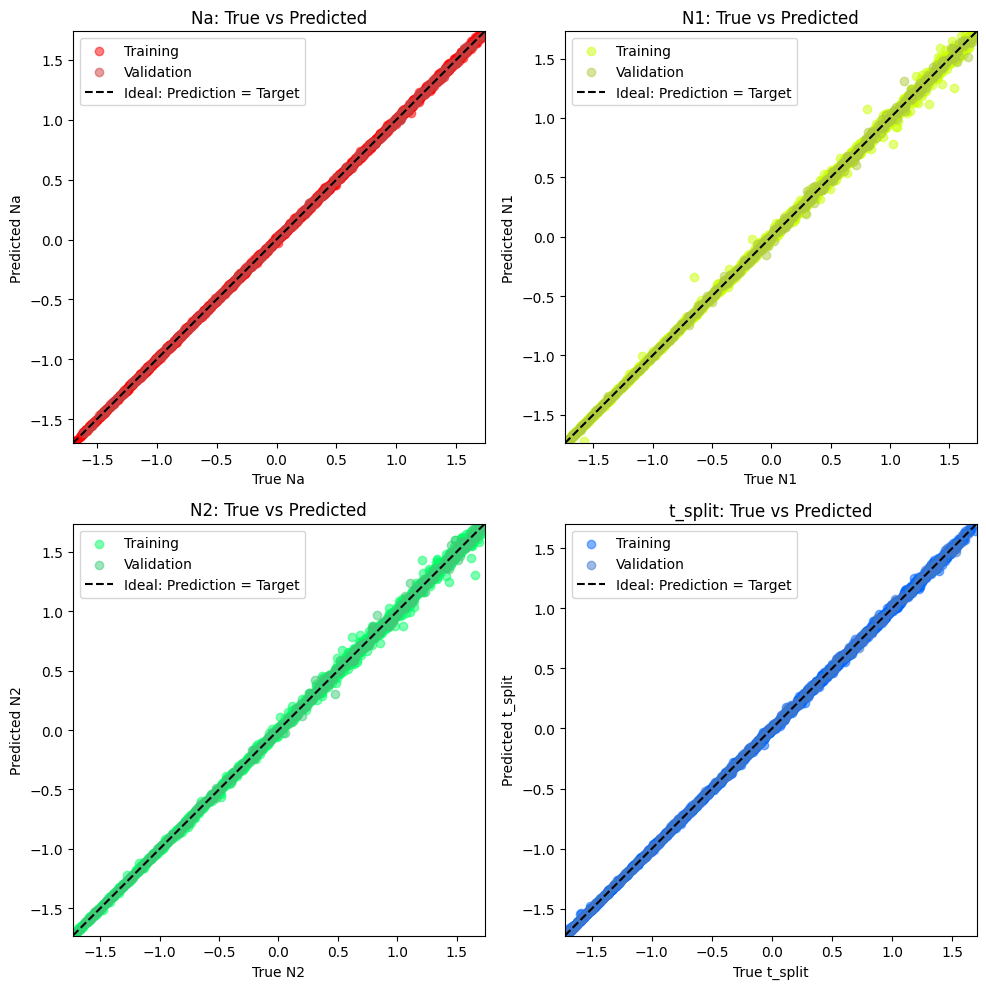

Linear model trained LFG


In [65]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

In [66]:
with open('/sietch_colab/akapoor/Demographic_Inference/model1_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [67]:
import numpy as np

# Extract predictions and targets
predictions = linear_mdl_obj['validation']['predictions']
targets = linear_mdl_obj['validation']['targets']

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE for each column
mse_values = []
for col in range(targets.shape[1]):
    mse = calculate_mse(targets[:, col], predictions[:, col])
    mse_values.append(mse)

# Print MSE results for each column
for i, mse in enumerate(mse_values):
    print(f"Column {i + 1} MSE: {mse:.4f}")


Column 1 MSE: 0.0001
Column 2 MSE: 0.0005
Column 3 MSE: 0.0005
Column 4 MSE: 0.0002


## Model 2: Dadi, Moments, MomentsLD, FIM

In [68]:
experiment_directory = 'model2_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [69]:
os.makedirs(experiment_directory, exist_ok=True)

In [70]:
train_features.columns

Index(['dadi_rep1_Na', 'moments_rep1_Na', 'dadi_rep1_N1', 'moments_rep1_N1',
       'dadi_rep1_N2', 'moments_rep1_N2', 'dadi_rep1_t_split',
       'moments_rep1_t_split', 'FIM_element_0', 'FIM_element_1',
       'FIM_element_2', 'FIM_element_3', 'FIM_element_4', 'FIM_element_5',
       'FIM_element_6', 'FIM_element_7', 'FIM_element_8', 'FIM_element_9',
       'dadi_rep2_Na', 'moments_rep2_Na', 'dadi_rep2_N1', 'moments_rep2_N1',
       'dadi_rep2_N2', 'moments_rep2_N2', 'dadi_rep2_t_split',
       'moments_rep2_t_split', 'momentsLD_Na', 'momentsLD_N1', 'momentsLD_N2',
       'momentsLD_t_split'],
      dtype='object')

In [71]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl2 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl2 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [72]:
train_targets_mdl2 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl2 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [73]:
train_features_mdl2

,dadi_rep1_Na,moments_rep1_Na,dadi_rep1_N1,moments_rep1_N1,dadi_rep1_N2,moments_rep1_N2,dadi_rep1_t_split,moments_rep1_t_split,FIM_element_0,FIM_element_1,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,19260.928013,19308.973163,11923.469066,11940.278187,25662.858324,25543.496745,1887.406348,1878.621907,-4.335235e+05,-3.329999e+04,...,11923.487126,11940.226814,25662.887497,25543.886903,1887.411813,1878.616695,19039.244606,12136.260496,26540.136648,1880.557323
1,16739.867624,16787.448862,28308.987562,28294.659582,27394.557856,27382.379430,15634.506091,15637.656146,-1.493527e+05,-1.879096e+04,...,28308.894293,28303.981053,27394.556262,27380.397032,15634.829761,15636.795904,17293.251005,28339.335570,27363.714205,16237.699003
2,29154.876743,29193.933669,21122.069219,21135.213795,4018.536681,4026.230517,12492.603927,12496.332293,-8.774590e+05,-3.403963e+05,...,21083.604620,21138.010729,4017.891878,4025.983688,12531.919639,12494.068479,29488.113014,21645.500877,4040.579011,12865.523144
3,6492.312960,6524.674095,26265.239051,26247.535502,20426.286985,20613.607438,1039.622796,1031.725387,-2.006679e+03,-4.205621e+02,...,27329.638129,26299.284192,21208.618716,20615.392792,1037.849954,1031.109298,6244.174997,28150.117500,21409.183867,1038.951105
4,16331.949271,16356.405959,4009.324200,4016.374924,6359.820892,6366.914140,6016.588652,6027.735562,-3.907509e+06,-2.995503e+05,...,4009.314992,4015.828139,6359.783729,6366.928658,6015.975587,6015.819322,16238.836310,4028.539337,6496.426033,6200.148194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,23342.543298,23415.687867,24934.534015,24873.896585,21550.882469,21548.952286,4894.474661,4865.036575,-2.293272e+05,-5.045583e+04,...,24936.277328,24869.839707,21550.874508,21550.053556,4893.928517,4876.751403,23880.519655,24979.645755,21836.828722,4850.271894
3056,22130.473377,22171.878035,3812.050961,3815.548453,2293.820712,2299.416310,4206.976128,4220.952623,-9.319674e+06,-1.547662e+06,...,3805.279546,3818.794126,2289.228476,2303.463411,4183.492292,4228.760523,23501.924813,3876.365604,2323.144703,4207.904408
3057,25009.974665,25063.519416,15807.458655,15817.704749,20497.894883,20509.384633,6074.695873,6066.936786,-8.123293e+05,-1.072268e+05,...,15807.239238,15828.658771,20498.498702,20502.674234,6074.513456,6071.569707,25026.095942,15861.289905,20939.975514,6094.510162
3058,10431.179115,10451.333442,10860.509908,10869.959682,7891.603421,7898.982666,17176.892333,17196.595884,-2.561240e+05,-3.322589e+04,...,10860.668043,10868.259241,7891.666410,7898.329950,17177.263882,17184.392318,12077.473937,11691.330652,8614.949135,19340.807319


In [74]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [75]:
train_features_mdl2.columns

Index(['dadi_rep1_Na', 'moments_rep1_Na', 'dadi_rep1_N1', 'moments_rep1_N1',
       'dadi_rep1_N2', 'moments_rep1_N2', 'dadi_rep1_t_split',
       'moments_rep1_t_split', 'FIM_element_0', 'FIM_element_1',
       'FIM_element_2', 'FIM_element_3', 'FIM_element_4', 'FIM_element_5',
       'FIM_element_6', 'FIM_element_7', 'FIM_element_8', 'FIM_element_9',
       'dadi_rep2_Na', 'moments_rep2_Na', 'dadi_rep2_N1', 'moments_rep2_N1',
       'dadi_rep2_N2', 'moments_rep2_N2', 'dadi_rep2_t_split',
       'moments_rep2_t_split', 'momentsLD_Na', 'momentsLD_N1', 'momentsLD_N2',
       'momentsLD_t_split'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fim_columns = [col for col in train_features_mdl2.columns if 'FIM_element' in col]
train_features_mdl2[fim_columns] = scaler.fit_transform(train_features_mdl2[fim_columns])

scaler = StandardScaler()
fim_columns = [col for col in validation_features_mdl2.columns if 'FIM_element' in col]
validation_features_mdl2[fim_columns] = scaler.fit_transform(validation_features_mdl2[fim_columns])




In [77]:
features_and_targets['training']['features'] = train_features_mdl2.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl2.to_numpy()

In [78]:
features_and_targets['training']['targets'] = train_targets_mdl2.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl2.to_numpy()

In [79]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [80]:
from snakemake_scripts.linear_evaluation import linear_evaluation

PREDICTIONS SHAPE TRAINING: (3060, 4)
[1.05964034e-03 4.30150282e-04 2.96381693e-04 ... 8.76601048e-05
 1.68396235e-05 2.84769353e-03]
[4.11807131e-04 4.37225696e-05 3.10909913e-04 4.02273147e-05
 9.85429453e-05 3.41174348e-04 3.06408949e-05 2.19165890e-04
 1.12452456e-04 1.43522650e-04 5.69181313e-05 5.88953292e-05
 1.39107597e-04 1.27720988e-04 3.77288473e-04 3.74015870e-05
 1.13978017e-04 5.28316945e-05 3.54608845e-04 5.05177863e-05
 2.30409381e-04 1.85291849e-04 7.86849888e-05 1.50145443e-04
 1.35561803e-04 1.70906590e-04 8.10549868e-05 9.67914703e-05
 2.70409775e-04 3.14316881e-04 1.16011308e-04 8.24217459e-04
 1.61685916e-04 2.61430039e-05 2.84475000e-05 1.06758431e-04
 1.22926289e-03 3.92630797e-03 3.32238075e-04 5.59897499e-04
 3.36410340e-04 2.33214882e-04 1.77842300e-04 3.17318608e-04
 9.88402299e-05 1.63600538e-04 4.93921235e-05 3.49496375e-05
 3.53979202e-05 2.03070068e-04 4.48170760e-04 1.87235762e-04
 5.06241411e-04 1.30718031e-04 1.38773297e-03 6.82678328e-05
 1.27021924

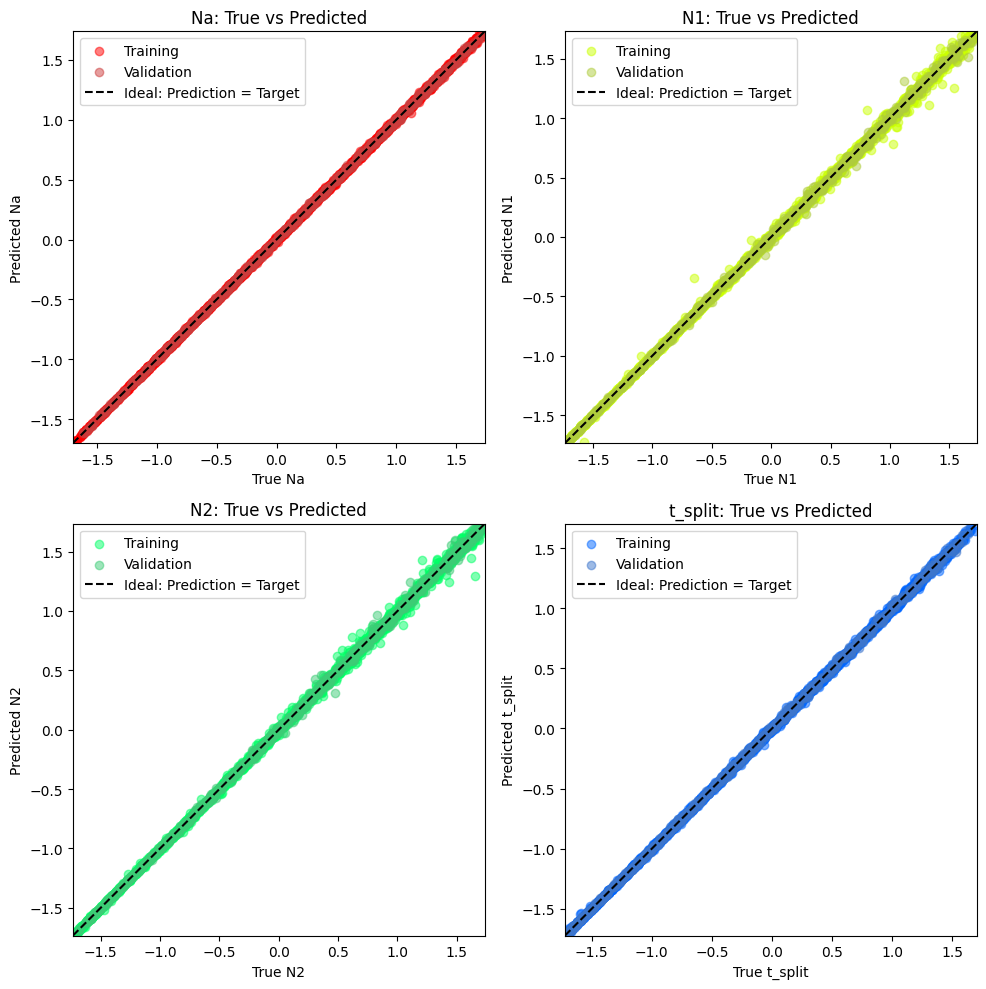

Linear model trained LFG


In [81]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

Let's open the Linear model object and get the predictions

In [85]:
with open('/sietch_colab/akapoor/Demographic_Inference/model2_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [86]:
import numpy as np

# Extract predictions and targets
predictions = linear_mdl_obj['validation']['predictions']
targets = linear_mdl_obj['validation']['targets']

# Function to calculate MSE
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Calculate MSE for each column
mse_values = []
for col in range(targets.shape[1]):
    mse = calculate_mse(targets[:, col], predictions[:, col])
    mse_values.append(mse)

# Print MSE results for each column
for i, mse in enumerate(mse_values):
    print(f"Column {i + 1} MSE: {mse:.4f}")

Column 1 MSE: 0.0001
Column 2 MSE: 0.0005
Column 3 MSE: 0.0005
Column 4 MSE: 0.0002


In [ ]:
import matplotlib.pyplot as plt
def plot_comparison_barplot(result_df, title='MSE by Parameter and Method'):
   """
   Create grouped bar plot comparing MomentsLD and Model3 MSE values
   
   Parameters:
   -----------
   result_df : pandas DataFrame
       DataFrame containing MomentsLD, MomentsLD_std_err, Model3, and Model3_std_err columns
   title : str
       Title for the plot
   
   Returns:
   --------
   fig : matplotlib figure object
   """
   # Get parameter names (indices of DataFrame)
   params = result_df.index
   
   # Create grouped bar plot
   x = np.arange(len(params))
   width = 0.35  # Made slightly wider for better visibility

   fig, ax = plt.subplots(figsize=(10, 6))

   # Create bars with error bars
   rects1 = ax.bar(x - width/2, result_df['MomentsLD'], width,
                   yerr=result_df['MomentsLD_std_err'],
                   label='MomentsLD', capsize=5, color='green')
   rects2 = ax.bar(x + width/2, result_df['Model2'], width,
                   yerr=result_df['Model2_std_err'],
                   label='Model2', capsize=5, color='purple')

   ax.set_ylabel('MSE')
   ax.set_title(title)
   ax.set_xticks(x)
   ax.set_xticklabels(params)
   ax.legend()

   # Add some padding to the top of the plot to show error bars fully
   ax.set_ylim(0, max(result_df['MomentsLD'].max(), result_df['Model2'].max()) * 1.2)

   plt.tight_layout()
   
   return fig

# Usage example:
fig = plot_comparison_barplot(result_df1_train, "Training Set MSE by Parameter and Method")
plt.show()

fig = plot_comparison_barplot(result_df1_validation, "Validation Set MSE by Parameter and Method")
plt.show()

### Model 3.2: Lasso Regression using the actual SFS

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model and make predictions
lasso.fit(train_features_mdl3, train_targets_mdl3)
lasso_predictions = lasso.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = lasso.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = lasso_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=lasso_predictions
)


In [ ]:
rrmse_dict

## Model 3

In [126]:
def get_overlapping_simulations(software_dir, momentsLD_dir):
    """
    Find overlapping simulation files between software and momentsLD directories
    
    Args:
        software_dir (str): Path to software inferences directory
        momentsLD_dir (str): Path to momentsLD inferences directory
        
    Returns:
        tuple: Lists of overlapping software and momentsLD files (with full paths)
    """
    # Get list of files in each directory
    momentsLD_files = os.listdir(momentsLD_dir)
    software_files = os.listdir(software_dir)
    
    # Extract numbers from momentsLD files
    momentsLD_numbers = set()
    momentsLD_file_dict = {}  # Store mapping of number to full filename
    
    for file in momentsLD_files:
        if file.startswith('momentsLD_inferences_sim_') and file.endswith('.pkl'):
            try:
                num = int(file.split('_')[-1].split('.')[0])
                momentsLD_numbers.add(num)
                momentsLD_file_dict[num] = file
            except ValueError:
                continue

    # Find matching software files
    overlapping_software_files = []
    overlapping_momentsLD_files = []
    
    for file in software_files:
        if file.startswith('software_inferences_sim_') and file.endswith('.pkl'):
            try:
                num = int(file.split('_')[-1].split('.')[0])
                if num in momentsLD_numbers:
                    # Store full paths
                    overlapping_software_files.append(os.path.join(software_dir, file))
                    overlapping_momentsLD_files.append(os.path.join(momentsLD_dir, momentsLD_file_dict[num]))
            except ValueError:
                continue

    # Sort both lists by simulation number
    sorted_pairs = sorted(zip(overlapping_software_files, overlapping_momentsLD_files), 
                         key=lambda x: int(x[0].split('_')[-1].split('.')[0]))
    
    overlapping_software_files, overlapping_momentsLD_files = zip(*sorted_pairs)
    
    print(f"Found {len(momentsLD_numbers)} momentsLD files")
    print(f"Found {len(overlapping_software_files)} overlapping pairs")
    
    if overlapping_software_files:
        print("\nSample of overlapping simulation numbers:")
        for software_file in list(overlapping_software_files)[:5]:
            num = int(software_file.split('_')[-1].split('.')[0])
            print(f"Simulation {num}")
            
    return list(overlapping_software_files), list(overlapping_momentsLD_files)

# Use the function
software_inferences_dir = "/sietch_colab/akapoor/Demographic_Inference/software_inferences_dir"
momentsLD_inferences_dir = "/sietch_colab/akapoor/Demographic_Inference/final_LD_inferences"

# Get the overlapping files with full paths
software_files, momentsLD_files = get_overlapping_simulations(software_inferences_dir, momentsLD_inferences_dir)

Found 4923 momentsLD files
Found 4923 overlapping pairs

Sample of overlapping simulation numbers:
Simulation 0
Simulation 1
Simulation 2
Simulation 3
Simulation 4


In [127]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [128]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [129]:
software_files[train_indices[-1]]

'/sietch_colab/akapoor/Demographic_Inference/software_inferences_dir/software_inferences_sim_4249.pkl'

In [130]:
experiment_directory = 'model3.1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [131]:
os.makedirs(experiment_directory, exist_ok=True)

In [132]:
train_features

,dadi_rep1_Na,moments_rep1_Na,dadi_rep1_N1,moments_rep1_N1,dadi_rep1_N2,moments_rep1_N2,dadi_rep1_t_split,moments_rep1_t_split,FIM_element_0,FIM_element_1,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,19260.928013,19308.973163,11923.469066,11940.278187,25662.858324,25543.496745,1887.406348,1878.621907,-4.335235e+05,-3.329999e+04,...,11923.487126,11940.226814,25662.887497,25543.886903,1887.411813,1878.616695,19039.244606,12136.260496,26540.136648,1880.557323
1,16739.867624,16787.448862,28308.987562,28294.659582,27394.557856,27382.379430,15634.506091,15637.656146,-1.493527e+05,-1.879096e+04,...,28308.894293,28303.981053,27394.556262,27380.397032,15634.829761,15636.795904,17293.251005,28339.335570,27363.714205,16237.699003
2,29154.876743,29193.933669,21122.069219,21135.213795,4018.536681,4026.230517,12492.603927,12496.332293,-8.774590e+05,-3.403963e+05,...,21083.604620,21138.010729,4017.891878,4025.983688,12531.919639,12494.068479,29488.113014,21645.500877,4040.579011,12865.523144
3,6492.312960,6524.674095,26265.239051,26247.535502,20426.286985,20613.607438,1039.622796,1031.725387,-2.006679e+03,-4.205621e+02,...,27329.638129,26299.284192,21208.618716,20615.392792,1037.849954,1031.109298,6244.174997,28150.117500,21409.183867,1038.951105
4,16331.949271,16356.405959,4009.324200,4016.374924,6359.820892,6366.914140,6016.588652,6027.735562,-3.907509e+06,-2.995503e+05,...,4009.314992,4015.828139,6359.783729,6366.928658,6015.975587,6015.819322,16238.836310,4028.539337,6496.426033,6200.148194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,23342.543298,23415.687867,24934.534015,24873.896585,21550.882469,21548.952286,4894.474661,4865.036575,-2.293272e+05,-5.045583e+04,...,24936.277328,24869.839707,21550.874508,21550.053556,4893.928517,4876.751403,23880.519655,24979.645755,21836.828722,4850.271894
3056,22130.473377,22171.878035,3812.050961,3815.548453,2293.820712,2299.416310,4206.976128,4220.952623,-9.319674e+06,-1.547662e+06,...,3805.279546,3818.794126,2289.228476,2303.463411,4183.492292,4228.760523,23501.924813,3876.365604,2323.144703,4207.904408
3057,25009.974665,25063.519416,15807.458655,15817.704749,20497.894883,20509.384633,6074.695873,6066.936786,-8.123293e+05,-1.072268e+05,...,15807.239238,15828.658771,20498.498702,20502.674234,6074.513456,6071.569707,25026.095942,15861.289905,20939.975514,6094.510162
3058,10431.179115,10451.333442,10860.509908,10869.959682,7891.603421,7898.982666,17176.892333,17196.595884,-2.561240e+05,-3.322589e+04,...,10860.668043,10868.259241,7891.666410,7898.329950,17177.263882,17184.392318,12077.473937,11691.330652,8614.949135,19340.807319


I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [133]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl3 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]
validation_features_mdl3 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|ll', case=False, regex=True)]
]


In [134]:
train_features_mdl3

,dadi_rep1_Na,moments_rep1_Na,dadi_rep1_N1,moments_rep1_N1,dadi_rep1_N2,moments_rep1_N2,dadi_rep1_t_split,moments_rep1_t_split,FIM_element_0,FIM_element_1,...,dadi_rep2_N1,moments_rep2_N1,dadi_rep2_N2,moments_rep2_N2,dadi_rep2_t_split,moments_rep2_t_split,momentsLD_Na,momentsLD_N1,momentsLD_N2,momentsLD_t_split
0,19260.928013,19308.973163,11923.469066,11940.278187,25662.858324,25543.496745,1887.406348,1878.621907,-4.335235e+05,-3.329999e+04,...,11923.487126,11940.226814,25662.887497,25543.886903,1887.411813,1878.616695,19039.244606,12136.260496,26540.136648,1880.557323
1,16739.867624,16787.448862,28308.987562,28294.659582,27394.557856,27382.379430,15634.506091,15637.656146,-1.493527e+05,-1.879096e+04,...,28308.894293,28303.981053,27394.556262,27380.397032,15634.829761,15636.795904,17293.251005,28339.335570,27363.714205,16237.699003
2,29154.876743,29193.933669,21122.069219,21135.213795,4018.536681,4026.230517,12492.603927,12496.332293,-8.774590e+05,-3.403963e+05,...,21083.604620,21138.010729,4017.891878,4025.983688,12531.919639,12494.068479,29488.113014,21645.500877,4040.579011,12865.523144
3,6492.312960,6524.674095,26265.239051,26247.535502,20426.286985,20613.607438,1039.622796,1031.725387,-2.006679e+03,-4.205621e+02,...,27329.638129,26299.284192,21208.618716,20615.392792,1037.849954,1031.109298,6244.174997,28150.117500,21409.183867,1038.951105
4,16331.949271,16356.405959,4009.324200,4016.374924,6359.820892,6366.914140,6016.588652,6027.735562,-3.907509e+06,-2.995503e+05,...,4009.314992,4015.828139,6359.783729,6366.928658,6015.975587,6015.819322,16238.836310,4028.539337,6496.426033,6200.148194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,23342.543298,23415.687867,24934.534015,24873.896585,21550.882469,21548.952286,4894.474661,4865.036575,-2.293272e+05,-5.045583e+04,...,24936.277328,24869.839707,21550.874508,21550.053556,4893.928517,4876.751403,23880.519655,24979.645755,21836.828722,4850.271894
3056,22130.473377,22171.878035,3812.050961,3815.548453,2293.820712,2299.416310,4206.976128,4220.952623,-9.319674e+06,-1.547662e+06,...,3805.279546,3818.794126,2289.228476,2303.463411,4183.492292,4228.760523,23501.924813,3876.365604,2323.144703,4207.904408
3057,25009.974665,25063.519416,15807.458655,15817.704749,20497.894883,20509.384633,6074.695873,6066.936786,-8.123293e+05,-1.072268e+05,...,15807.239238,15828.658771,20498.498702,20502.674234,6074.513456,6071.569707,25026.095942,15861.289905,20939.975514,6094.510162
3058,10431.179115,10451.333442,10860.509908,10869.959682,7891.603421,7898.982666,17176.892333,17196.595884,-2.561240e+05,-3.322589e+04,...,10860.668043,10868.259241,7891.666410,7898.329950,17177.263882,17184.392318,12077.473937,11691.330652,8614.949135,19340.807319


In [135]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = software_files[idx]
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)

    selected_SFS = data['sfs']
    
    # # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Select all columns except first and last
# sfs_features_df = sfs_features_df.iloc[:, 1:-1]

scaler = StandardScaler()
sfs_features_scaled_df = pd.DataFrame(
    scaler.fit_transform(sfs_features_df),  # Transform the data
    columns=sfs_features_df.columns,        # Keep the column names
    index=sfs_features_df.index            # Keep the index
)

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl3 = pd.concat([train_features_mdl3.reset_index(drop=True), sfs_features_scaled_df.reset_index(drop=True)], axis=1)


Processing SFS data:   1%|          | 35/4000 [00:00<00:01, 3952.74it/s]


IndexError: list index out of range

In [111]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/software_inferences_dir', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Select all columns except first and last
# sfs_features_df = sfs_features_df.iloc[:, 1:-1]

scaler = StandardScaler()
sfs_features_df = pd.DataFrame(
    scaler.fit_transform(sfs_features_df),  # Transform the data
    columns=sfs_features_df.columns,        # Keep the column names
    index=sfs_features_df.index            # Keep the index
)

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl3 = pd.concat([validation_features_mdl3.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


Processing SFS data: 100%|██████████| 1000/1000 [00:00<00:00, 4142.45it/s]


In [112]:
train_targets_mdl3 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl3 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [113]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [114]:
features_and_targets['training']['features'] = train_features_mdl3.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl3.to_numpy()

In [115]:
features_and_targets['training']['targets'] = train_targets_mdl3.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl3.to_numpy()

In [116]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)

In [ ]:
experiment_directory

Let's open the Linear model object and get the predictions

In [ ]:
with open('/sietch_colab/akapoor/Demographic_Inference/model3_results/linear_mdl_obj.pkl', 'rb') as f:
    linear_mdl_obj = pickle.load(f)

In [ ]:
linear_mdl_obj.keys()

In [ ]:
linear_mdl_obj['param_names']

In [ ]:
linear_mdl_obj['training']

In [ ]:
def calculate_mse_df(dataset_type, linear_mdl_obj):
    """Calculate MSE and standard errors for a given dataset type (training or validation)"""
    params = linear_mdl_obj['param_names']
    mse_values = {}
    mse_errors = {}

    for i, param in enumerate(params):
        mse_values[param] = {}
        mse_errors[param] = {}
        target_values = linear_mdl_obj[dataset_type]['targets'][i]
        predictions = linear_mdl_obj[dataset_type]['predictions'][i]
        
        # Calculate MSE for each simulation
        squared_errors = (predictions - target_values) ** 2

        # Mean MSE across all simulations
        mse_values[param]['model3'] = np.mean(squared_errors)

        # Standard error of MSE across simulations
        mse_errors[param]['model3'] = np.std(squared_errors) / np.sqrt(len(squared_errors))

    # Create DataFrame
    result_df = pd.DataFrame({
        'Model3': [mse_values[p]['model3'] for p in params],
        'Model3_std_err': [mse_errors[p]['model3'] for p in params],
    }, index=params)
    
    return result_df

# Calculate MSE for both datasets
train_df = calculate_mse_df('training', linear_mdl_obj)
val_df = calculate_mse_df('validation', linear_mdl_obj)

print("Training MSE Values and Standard Errors:")
print(train_df)
print("\nValidation MSE Values and Standard Errors:")
print(val_df)


Load in the the raw features MSE values for comparison (calculated in the probing_inference.ipynb)

In [ ]:
import pandas as pd
momentsld_train = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_train.csv', index_col = 0)
momentsld_validation = pd.read_csv('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/mean_values_preprocess_validation.csv', index_col = 0)

In [ ]:
# Using str.contains()
momentsLD_train = momentsld_train.loc[:, momentsld_train.columns.str.contains('MomentsLD')]
momentsLD_validation = momentsld_validation.loc[:, momentsld_validation.columns.str.contains('MomentsLD')]


In [ ]:
# Merge dataframes horizontally
result_df1_train = pd.concat([momentsLD_train, train_df], axis=1)
result_df1_validation = pd.concat([momentsLD_validation, val_df], axis=1)

In [ ]:
import matplotlib.pyplot as plt
def plot_comparison_barplot(result_df, title='MSE by Parameter and Method'):
   """
   Create grouped bar plot comparing MomentsLD and Model3 MSE values
   
   Parameters:
   -----------
   result_df : pandas DataFrame
       DataFrame containing MomentsLD, MomentsLD_std_err, Model3, and Model3_std_err columns
   title : str
       Title for the plot
   
   Returns:
   --------
   fig : matplotlib figure object
   """
   # Get parameter names (indices of DataFrame)
   params = result_df.index
   
   # Create grouped bar plot
   x = np.arange(len(params))
   width = 0.35  # Made slightly wider for better visibility

   fig, ax = plt.subplots(figsize=(10, 6))

   # Create bars with error bars
   rects1 = ax.bar(x - width/2, result_df['MomentsLD'], width,
                   yerr=result_df['MomentsLD_std_err'],
                   label='MomentsLD', capsize=5, color='green')
   rects2 = ax.bar(x + width/2, result_df['Model3'], width,
                   yerr=result_df['Model3_std_err'],
                   label='Model3', capsize=5, color='purple')

   ax.set_ylabel('MSE')
   ax.set_title(title)
   ax.set_xticks(x)
   ax.set_xticklabels(params)
   ax.legend()

   # Add some padding to the top of the plot to show error bars fully
   ax.set_ylim(0, max(result_df['MomentsLD'].max(), result_df['Model3'].max()) * 1.2)

   plt.tight_layout()
   
   return fig

# Usage example:
fig = plot_comparison_barplot(result_df1_train, "Training Set MSE by Parameter and Method")
plt.show()

fig = plot_comparison_barplot(result_df1_validation, "Validation Set MSE by Parameter and Method")
plt.show()

### Model 3.2: Lasso Regression using the actual SFS

In [ ]:
from sklearn.linear_model import Lasso, ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
lasso = Lasso(alpha=0.1, random_state=42)

# Fit the model and make predictions
lasso.fit(train_features_mdl3, train_targets_mdl3)
lasso_predictions = lasso.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = lasso.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = lasso_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=lasso_predictions
)


In [ ]:
rrmse_dict

### Model 3.3: Elastic Net Regression using the actual SFS

In [ ]:
from sklearn.linear_model import ElasticNet

# Now let's implement Lasso Regression
# alpha is the regularization strength - higher values mean stronger regularization
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Fit the model and make predictions
elastic_net.fit(train_features_mdl3, train_targets_mdl3)
elastic_net_predictions = elastic_net.predict(validation_features_mdl3)



In [ ]:
linear_mdl_obj = {}
linear_mdl_obj['training'] = {}
linear_mdl_obj['validation'] = {}

linear_mdl_obj['training']['predictions'] = elastic_net.predict(train_features_mdl3)
linear_mdl_obj['training']['targets'] = train_targets_mdl3

linear_mdl_obj['validation']['predictions'] = elastic_net_predictions
linear_mdl_obj['validation']['targets'] = validation_targets_mdl3
linear_mdl_obj['param_names'] = train_targets_mdl3.columns

In [ ]:
from src.utils import mean_squared_error

In [ ]:
rrmse_dict = {}
rrmse_dict["training"] = mean_squared_error(
    y_true=linear_mdl_obj["training"]["targets"], y_pred=linear_mdl_obj['training']['predictions']
)
rrmse_dict["validation"] = mean_squared_error(
    y_true=linear_mdl_obj["validation"]["targets"], y_pred=elastic_net_predictions
)


In [ ]:
rrmse_dict

## Model 4

In [ ]:
experiment_directory = 'model4.1_results'
experiment_config_path = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
model_directory = experiment_directory
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json'
features_file = f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/main_colors.pkl'

In [ ]:
os.makedirs(experiment_directory, exist_ok=True)

In [ ]:
train_features

I want to get the row simulation numbers so I can append the SFS to each row. To do this, load the preprocessing object which has the indices saved.

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [ ]:
train_indices = preprocessing_results['training']['indices']
validation_indices = preprocessing_results['validation']['indices']

In [ ]:
# Drop columns with "_m", "FIM", or "ll" in their names
train_features_mdl4 = train_features[
    train_features.columns[~train_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]
validation_features_mdl4 = validation_features[
    validation_features.columns[~validation_features.columns.str.contains(r'_m|FIM|ll', case=False, regex=True)]
]


In [ ]:
train_features_mdl4

In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(train_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
train_features_mdl4 = pd.concat([train_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


In [ ]:
train_features_mdl4.shape

In [ ]:
# Initialize a list to store flattened SFS data
flattened_SFS_data = []

# Process each index in train_indices
for idx in tqdm(validation_indices, desc="Processing SFS data"):
    file_path = os.path.join('/sietch_colab/akapoor/Demographic_Inference/moments_dadi_features', f"software_inferences_sim_{idx}.pkl")
    
    # Load the data from the file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Find the index of the maximum log-likelihood in 'll_all_replicates_dadi'
    # max_ll_index = np.argmax(data['ll_all_replicates_dadi'])
    
    # # Extract the corresponding SFS
    # selected_SFS = data['model_sfs_dadi'][max_ll_index]

    selected_SFS = data['sfs']
    
    # Flatten the SFS and append to the list
    flattened_SFS = np.array(selected_SFS.flatten())
    flattened_SFS_data.append(flattened_SFS)

# Convert the flattened SFS data to a DataFrame
sfs_features_df = pd.DataFrame(flattened_SFS_data)

# Rename columns to SFS_feature_0, SFS_feature_1, ..., SFS_feature_N
sfs_features_df.columns = [f"SFS_feature_{i}" for i in range(sfs_features_df.shape[1])]

# Append the new SFS columns to `train_features_mdl3` as new columns
# No merging by indices, just appending directly
validation_features_mdl4 = pd.concat([validation_features_mdl4.reset_index(drop=True), sfs_features_df.reset_index(drop=True)], axis=1)


In [ ]:
train_targets_mdl4 = train_targets[
    train_targets.columns[~train_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

validation_targets_mdl4 = validation_targets[
    validation_targets.columns[~validation_targets.columns.str.contains(r'_m', case=False, regex=True)]
]

In [ ]:
import pickle
with open('/sietch_colab/akapoor/Demographic_Inference/sims_pretrain_5000_sims_inference_1_seed_42_num_replicates_3_top_values_2/features_and_targets.pkl', 'rb') as f:
    features_and_targets = pickle.load(f)

In [ ]:
features_and_targets['training']['features'] = train_features_mdl4.to_numpy()
features_and_targets['validation']['features'] = validation_features_mdl4.to_numpy()

In [ ]:
features_and_targets['training']['targets'] = train_targets_mdl4.to_numpy()
features_and_targets['validation']['targets'] = validation_targets_mdl4.to_numpy()

In [ ]:
# Save the updated features and targets
with open(f'/sietch_colab/akapoor/Demographic_Inference/{experiment_directory}/features_and_targets.pkl', 'wb') as f:
    pickle.dump(features_and_targets, f)

In [ ]:
from snakemake_scripts.linear_evaluation import linear_evaluation

In [ ]:
linear_evaluation(features_and_targets_filepath = features_file, model_directory = model_directory, model_config_path = model_config_file, color_shades_path = color_shades, main_colors_path = main_colors)